Import Libraries

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report

Load Data

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Data Shaping

In [9]:
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

Print shape

In [11]:
print(f'Train Images Shape: {x_train.shape}')
print(f'Train Labels Shape: {y_train.shape}')
print(f'Test Images Shape: {x_test.shape}')
print(f'Test Labels Shape: {y_test.shape}')

Train Images Shape: (60000, 784)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 784)
Test Labels Shape: (10000,)


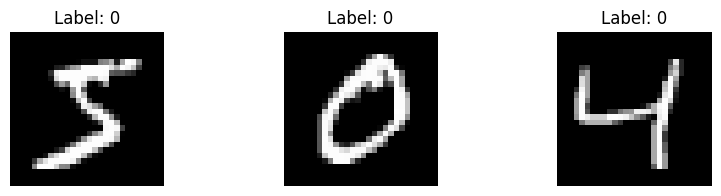

In [12]:
def visualize_images(images, labels, num_images=5):
    images = images.reshape((-1, 28, 28))
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Label: {}".format(np.argmax(labels[i])))
        plt.axis('off')
    plt.show()

visualize_images(x_train, y_train, num_images=3)

In [13]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))
        return exp_z / exp_z.sum(axis=0, keepdims=True)

    def forward(self, X):
        # Hidden layer
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        
        # Output layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)
        
        return self.A2

    def backward(self, X, Y, output):
        m = X.shape[1]
        
        # Output layer
        dZ2 = output - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        # Hidden layer
        dZ1 = np.dot(self.W2.T, dZ2) * self.sigmoid_derivative(self.Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, db1, dW2, db2

    def train(self, X, Y, learning_rate, epochs):
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, Y, output)
            
            # Update parameters
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=0)

    def evaluate(self, X, Y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == Y)
        return accuracy